In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import pandas as pd

from dbspace.signal.spot_check import spot_check


In [25]:
def stim_plot(ts,Fs, nfft=2**15, nperseg=2**10):
    plt.figure()
    plt.subplot(211)
    plt.plot(np.linspace(0,ts.shape[0]/Fs,ts.shape[0]),ts)
    
    plt.subplot(212)
    F,Pxx = sig.welch(ts,fs=Fs,nfft=nfft,nperseg=nperseg,noverlap=0)
    plt.plot(F,(Pxx),linewidth=5,label='Sampled')
    
    return F

def raw(timeseries):
    stim_plot(timeseries[:,1],Fs=1e6)
    
def decimated(timeseries: np.ndarray, Fs: int, factor: int=100, clip_samples:int = None, **kwargs):
    '''
        Inputs:
        ------
            timeseries : np.ndarray
                Timeseries for analysis. Assumes dim[0] is time.
    '''
    if clip_samples is None:
        clip_samples = 70_000
    elif clip_samples == -1:
        clip_samples = timeseries.shape[0]

    if factor == 1:
        ds_stim = timeseries[0:clip_samples,...]    
    else:
        ds_stim = sig.decimate(timeseries[0:clip_samples,...],q=factor)
        
    print(stim_plot(ds_stim,Fs=Fs/factor, **kwargs))


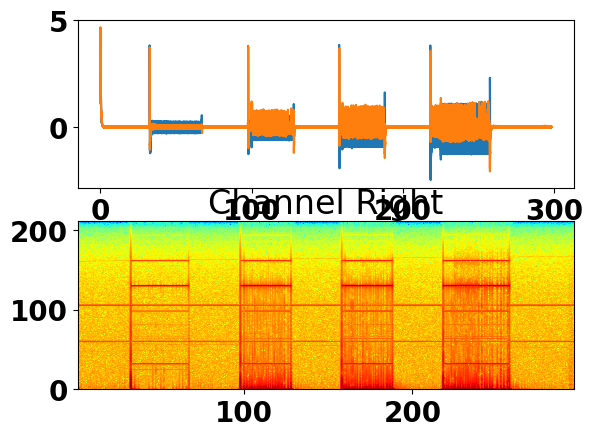

In [27]:
sample_voltage_sweep = '/home/vscode/data/experiments/in_vitr/voltage_sweep.txt'
measured_timeseries = spot_check(sample_voltage_sweep,plot_sg=True)['TS']

125835


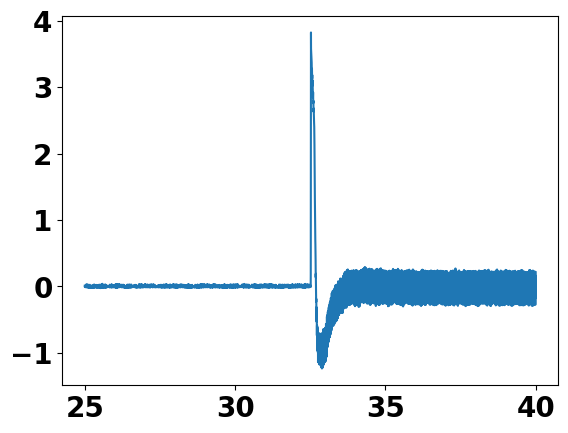

In [39]:
plot_ts = measured_timeseries['Left']
print(plot_ts.shape[0])
tvect = np.linspace(0, 1/422 * plot_ts.shape[0], plot_ts.shape[0])

timeslice = np.where(np.logical_and(tvect > 25, tvect < 40))

plt.plot(tvect[timeslice],plot_ts[timeslice])
plt.savefig('invitro_stim.svg')